Hola **Carlos**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripción del proyecto
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.  

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.  

Crea un modelo con el máximo valor *F1* posible. Para aprobar la revisión, necesitas un valor *F1* de al menos 0.59. Verifica F1 para el conjunto de prueba.  

Además, debes medir la métrica *AUC-ROC* y compararla con el valor *F1*.

## Instrucciones del proyecto
1. Descarga y prepara los datos.  Explica el procedimiento.
2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.
3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.
4. Realiza la prueba final.

## Descripción de los datos
Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos aqui: https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv

### Características

- *RowNumber*: índice de cadena de datos
- *CustomerId*: identificador de cliente único
Surname: apellido
- *CreditScore*: valor de crédito
- *Geography*: país de residencia
- *Gender*: sexo
- *Age*: edad
- *Tenure*: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- *Balance*: saldo de la cuenta
- *NumOfProducts*: número de productos bancarios utilizados por el cliente
- *HasCrCard*: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- *IsActiveMember*: actividad del cliente (1 - sí; 0 - no)
- *EstimatedSalary*: salario estimado

### Objetivo

- *Exited*: El cliente se ha ido (1 - sí; 0 - no)


## Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

- ¿Cómo preparaste los datos para el entrenamiento? ¿Procesaste todos los tipos de características?
- ¿Explicaste los pasos de preprocesamiento lo suficientemente bien?
- ¿Cómo investigaste el equilibrio de clases?
- ¿Estudiaste el modelo sin tener en cuenta el desequilibrio de clases?
- ¿Qué descubriste sobre la investigación del ejercicio?
- ¿Dividiste correctamente los datos en conjuntos?
- ¿Cómo trabajaste con el desequilibrio de clases?
- ¿Utilizaste al menos dos técnicas para corregir el desequilibrio?
- ¿Realizaste correctamente el entrenamiento, la validación y las pruebas finales del modelo?
- ¿Qué tan alto es tu valor F1?
- ¿Examinaste los valores AUC-ROC?
- ¿Mantuviste la estructura del proyecto y el código limpio?

# Proyecto

## Análisis Exploratorio

In [81]:
# Importo mis librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
        KFold,
    StratifiedKFold,
    cross_val_score,
    TimeSeriesSplit
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [46]:
# from verstack import NaNImputer

Importo verstack para luego probar cosas, la documentación esta aqui: https://verstack.readthedocs.io/en/latest/# , esta libreria ayuda con la imputacion y optimizacion de recursos al usar pandas.

In [47]:
# imputer = NaNImputer()
# df_imputed = imputer.impute(df)

In [48]:
# Importo y veo mi dataframe

df = pd.read_csv('databases/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [49]:
pd.set_option('display.float_format', '{:,.2f}'.format)

display(
    df.info(),
    df.describe(),
    df.duplicated().sum(),
    df.isna().sum(),
    df.isna().mean(), # Sirve para ver porcentualmente mis datos ausentes
    print(f'\nEl dataframe tiene una cantidad de {df.duplicated().sum()} valores duplicados'),
    df['Exited'].value_counts(1)
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

El dataframe tiene una cantidad de 0 valores duplicados


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


np.int64(0)

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

RowNumber         0.00
CustomerId        0.00
Surname           0.00
CreditScore       0.00
Geography         0.00
Gender            0.00
Age               0.00
Tenure            0.09
Balance           0.00
NumOfProducts     0.00
HasCrCard         0.00
IsActiveMember    0.00
EstimatedSalary   0.00
Exited            0.00
dtype: float64

None

Exited
0   0.80
1   0.20
Name: proportion, dtype: float64

Mi dataframe tiene lo siguiente:

- 909 Datos ausentes en la columna 'Tenure' que representa un 9% de los datos de la columna.
- No tiene datos duplicados.
- Hay columnas que hare drop para mejor manejo entrenamiento de mi modelo, estas son:
    - 'RowNumber' -> Solo es un duplicado de mi indice y no aporta nada al modelo.
    - 'CustomerId' -> A cada usuario se le asigna un ID, pero el ID es totalmente irrelevante para nuestro estudio.
    - 'Surname' -> El nombre si bien es una variable categorica, en este caos no nos aportara nada y seria una cantidad gigante de filas al aplicar OHE (One Hot Encoder).
- Mi dataset se encuentra desbalanceado con 80% de la clase mayoritaria y 20% de la clase minoritaria (1- el cliente se ha ido).

In [50]:
display(
    df['Tenure'].sort_values().unique(),
    df['Geography'].unique(),
    df['Gender'].unique() #En caso de que se use M, F y Unknown
)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

array(['France', 'Spain', 'Germany'], dtype=object)

array(['Female', 'Male'], dtype=object)

Basado en esta informacion, tengo que:
- Mis columnas categoricas son: 
    - 'Geography' -> Con France, Spain y Germany. Aplicare OHE aqui.
    - 'Gender' -> Con Male y Female, aplicare OHE aqui igual.
- Mis columnas numericas son, en todas estas lo metere a un pipeline donde rellenara con la media, aun que solo sea en Tenure, y despues se transformaran usando un standardscaler para la normalizacion de mis datos.
    - 'CreditScore'
    - 'Age'
    - 'Tenure'
    - 'Balance' 
    - 'NumOfProducts'
    - 'EstimatedSalary'
- Tengo columnas que son booleanas por naturaleza, usare 'passthrough' en mi pipeline para estas, las cuales son 'HAsCrCard' y 'IsActiveMember'


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial de los datos y la carga de lo necesario para trabajarlos
</div>

## Preprocesamiento

Empiezo armando mi pipeline para el preprocesamiento de datos, como dije anteriormente, dejare mis columnas booleanas intactas, a las numericas les aplicare un SimpleImputer con la media y Transformare con un StandardScaler, finalmente mis categoricos usare on OneHotEncoder dropeando la primera columna para bajar algo la cardinalidad.

In [51]:
# 📌 Separar características y target
X = df.drop(columns=["RowNumber","CustomerId","Surname","Exited"])
y = df["Exited"]

In [52]:
# 🔹 Identificar columnas por tipo
num_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
cat_features = ["Geography", "Gender"]
bool_features = ["HasCrCard", "IsActiveMember"]

# 🔹 Pipelines de preprocesamiento
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# 🔹 Combinar en un preprocesador general
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
    ("bool", "passthrough", bool_features)
])

transformed_data = preprocessor.fit_transform(X)

# Extrae el nombre de las columnas que usaron OHE
cat_ord_clean_cols = (
    preprocessor
    .named_transformers_
    ['cat']
    ['encoder']
    .get_feature_names_out(cat_features)
    .tolist()
)

# Nombrar columnas y ver que se haya efectuado correctamente.
data_clean = pd.DataFrame(
    transformed_data,
    columns = num_features+cat_ord_clean_cols+bool_features
)

In [53]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Geography', 'Gender']),
                                ('bool', 'passthrough',
                                 ['HasCrCard', 'IsActiveMember'])])

In [54]:
# Checo si mi informacion esta siendo procesada correctamente
data_clean.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
0,-0.33,0.29,-1.09,-1.23,-0.91,0.02,0.00,0.00,0.00,1.00,1.00
1,-0.44,0.20,-1.45,0.12,-0.91,0.22,0.00,1.00,0.00,0.00,1.00
2,-1.54,0.29,1.09,1.33,2.53,0.24,0.00,0.00,0.00,1.00,0.00
3,0.50,0.01,-1.45,-1.23,0.81,-0.11,0.00,0.00,0.00,0.00,0.00
4,2.06,0.39,-1.09,0.79,-0.91,-0.37,0.00,1.00,0.00,1.00,1.00


## Pipeline de Modelos Sin Balancear

Para este caso utilizare un pipeline con 3 modelos en gridsearchcv para poder optimizar mis hiperparametros. Estos modelos seran Regresion Logistica, DecisionTree y RandomForest. Utilizare Stratified K-Fold en mi CV para que tenga una mejor preservacion en el balance de clase y tener un F1 mas confiable.

In [55]:
# Hago el Split de mis Datos
X_train, X_test, y_train, y_test = train_test_split(
    data_clean, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien, ahora tienes los datos listos para el entrenamiento
</div>

In [56]:
# Creo el nuevo Pipeline
pipeline = Pipeline([
    ("classifier", LogisticRegression())
])

# Defino mi Grid e hiperparametros
param_grid = [
    # LogisticRegression
    {
        "classifier": [LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42, max_iter=1000)],
        "classifier__C": [0.01, 0.1, 1, 10]
    },
    # DecisionTree
    {
        "classifier": [DecisionTreeClassifier(class_weight="balanced", random_state=42)],
        "classifier__max_depth": list(range(1, 11))
    },
    # RandomForest
    {
        "classifier": [RandomForestClassifier(class_weight="balanced", random_state=42)],
        "classifier__n_estimators": [10, 20, 30, 40, 50],
        "classifier__max_depth": list(range(1, 11))
    }
]

# Creo mi GridSearch

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [ ]:
# 📌 Entrenamos el modelo con todas las combinaciones
grid_search.fit(X_train, y_train)

# 📌 Mostramos los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor Precisión en Validación:", grid_search.best_score_)

# Evaluate on test set
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("✅ F1 en test:", f1)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores Hiperparámetros: {'classifier': RandomForestClassifier(class_weight='balanced', random_state=42), 'classifier__max_depth': 8, 'classifier__n_estimators': 50}
Mejor Precisión en Validación: 0.6101364386379071
✅ F1 en test: 0.6127292340884574
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.55      0.70      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



## Balanceando Mis Datos

Para balancear mis datos aplicare tanto oversampling como undersampling, para undersampling aplicare random undersampling y para oversampling aplicare smote. La idea es llevarlos a algo cercano a un 55-45 o 60-40. Utilizare mis mismos pipelines para acelerar todo el proceso de entrenamiento y procesamiento de datos clean.

In [73]:
# Aplico mis metodos de undersample y oversample
undersample = RandomUnderSampler(sampling_strategy=0.3, random_state=42)  # Reducir clase mayoritaria
X_under, y_under = undersample.fit_resample(data_clean, y)

oversample = SMOTE(sampling_strategy=0.80, random_state=42)  # Aumentar clase minoritaria
X_resampled, y_resampled = oversample.fit_resample(X_under, y_under)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, utilizar técnicas cómo sobre muestreo o sub muestreo pueden ayudar a los modelos con la interpretación de los datos. También existen otras técnicas cómo ajustar los parámetros de los modelos para que puedan clasificar bien la clase minoritaria
</div>

In [74]:
# Checo como esta la distribucion de mis valores
y_resampled.value_counts(1)

Exited
0   0.56
1   0.44
Name: proportion, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre en proyectos de clasificación utilizando Machine Learning lo primero que debes realizar es una revisión del balance de la variable objetivo ya que esto determinará la forma en la que realizarás los entrenamientos
</div>

In [ ]:
#  División en train y test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [76]:
#  Entrenamos el modelo con todas las combinaciones
grid_search.fit(X_train, y_train)

#  Mostramos los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor Precisión en Validación:", grid_search.best_score_)

# Evaluamos el set
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("✅ F1 en test:", f1)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores Hiperparámetros: {'classifier': RandomForestClassifier(class_weight='balanced', random_state=42), 'classifier__max_depth': 10, 'classifier__n_estimators': 30}
Mejor Precisión en Validación: 0.8306849436013332
✅ F1 en test: 0.8106904231625836
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2055
           1       0.83      0.79      0.81      1612

    accuracy                           0.84      3667
   macro avg       0.84      0.83      0.83      3667
weighted avg       0.84      0.84      0.84      3667



🔹 Accuracy: 0.84
🔹 Precision: 0.83
🔹 Recall: 0.79
🔹 F1-Score: 0.81
🔹 ROC-AUC: 0.92
🔹 Average Precision (AP): 0.91


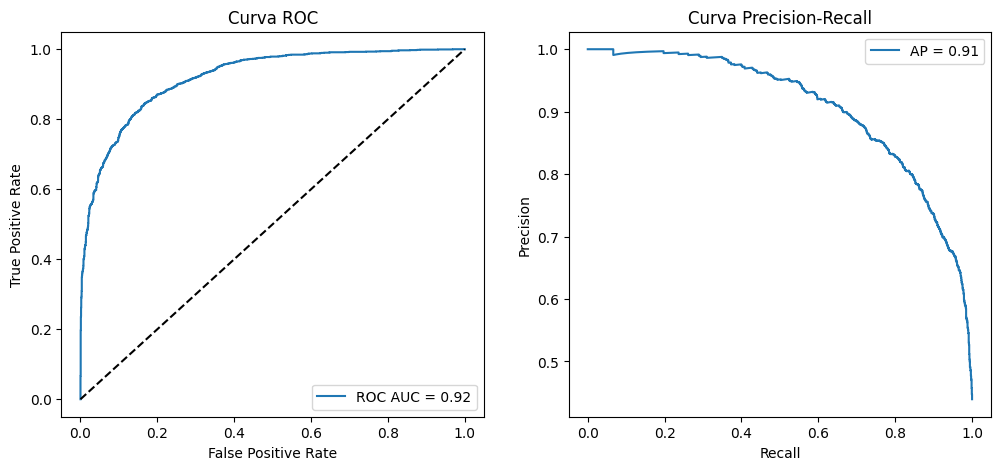

In [83]:
# 📊 Cálculo de métricas
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# 📌 Mostramos los valores de las métricas
print(f"🔹 Accuracy: {accuracy:.2f}")
print(f"🔹 Precision: {precision:.2f}")
print(f"🔹 Recall: {recall:.2f}")
print(f"🔹 F1-Score: {f1:.2f}")
print(f"🔹 ROC-AUC: {roc_auc:.2f}")
print(f"🔹 Average Precision (AP): {average_precision:.2f}")

# 📊 Graficamos las curvas ROC y Precision-Recall
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
ax[0].plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], 'k--')  # Línea de referencia
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("Curva ROC")
ax[0].legend()

# Curva Precision-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
ax[1].plot(recall_vals, precision_vals, label=f"AP = {average_precision:.2f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Curva Precision-Recall")
ax[1].legend()

plt.show()

## Conclusiones

El modelo al estar desbalanceado naturalmente puede llegar a tener un accuracy alto, sin embargo los resultados no estaran del todo correctos dado a que el modelo se entreno con datos equivocados y es posible que unicamente detecte ciertos casos por el fuerte sesgo en la clase mayoritaria.

Por otra parte, una vez que balanceamos el modelo, vemos como  su F1 score sube considerablemente al igual que su accuracy. El F1 nos demuestra que nuestro modelo tiene un performance balanceado. Finalmente la ROC-AUC nos demuestra claramente que el modelo rankea y evalua mejor que el hacer todo al azar. Considero que el modelo fue entrenado de manera exitosa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Carlos, se nota que conoces las métricas de evaluación y planteas conclusiones muy acertadas en cuanto a los resultados. Es importante siempre en un problema de ML identificar el balance entre las clases de tu variable objetivo para poder escoger la métrica correcta ya que para datasets desbalanceados la métrica de accuracy suele presentar buenos valores pero en realidad las predicciones no son buenas y es por la forma en cómo se calcula esta métrica que puede llevar a interpretaciones erroneas en cambio el f1-score es la ideal para este tipo de casos ya que maneja mejor este tipo de problemas.
    
    
Saludos!
</div>